(476, 700, 3)


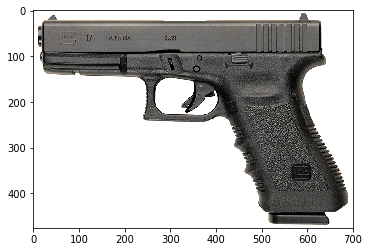

In [2]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import cv2

def loadImagebis(src):
    img=cv2.imread(src,1)
    rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(rgb,interpolation='nearest')
    plt.show()
    
def loadImage(path, gray=False):
    # TO COMPLETE
    img=cv2.imread(path,1)
    rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    grey = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    if gray:
        plt.imshow(grey,interpolation='nearest', cmap = plt.cm.gray)
        print(grey.shape)
        plt.show()
        return grey
    else :
        plt.imshow(rgb,interpolation='nearest', cmap = plt.cm.gray)
        print(rgb.shape)
        plt.show()
        return rgb

simplegun = loadImage('./Images/Glock173rdGen.jpg')

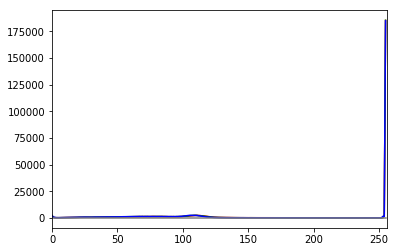

In [2]:
def calculhisto(I, grayI=None):
    # TO COMPLETE
    color = ('r','g','b')
    for i,col in enumerate(color):
        histr = cv2.calcHist([I],[i],None,[256],[0,256])
        plt.plot(histr,color = col)
        plt.xlim([0,256])
    grayhist = cv2.calcHist([grayI],[0],None,[256],[0,256])
    plt.plot(grayhist,color = 'gray')
    plt.xlim([0,256])
    plt.show()
    
calculhisto(simplegun)

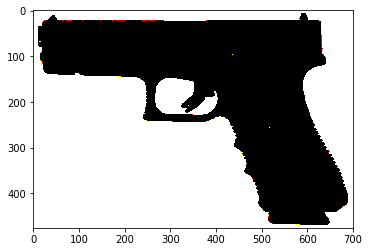

In [3]:
def seuillage(I,s):
    # TO COMPLETE
    ret, thres = cv2.threshold(I, s, 255, cv2.THRESH_BINARY)
    plt.imshow(thres,interpolation='nearest', cmap = plt.cm.gray)
    plt.show()
    return thres

thres = seuillage(simplegun, 200)

# SURF

run `pip uninstall opencv-contrib-python`.
Then ` pip install opencv-contrib-python==3.4.2.16` as SURF will only work on this one.

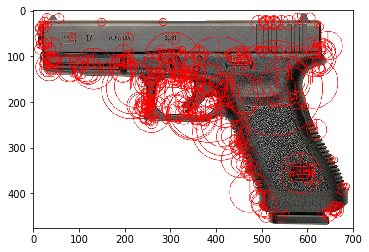

In [11]:
import cv2
import matplotlib.pyplot as plt

def surf(image, threshold=300):
    
    surf = cv2.xfeatures2d.SURF_create(threshold)
    surf.setUpright(True)

    kp_train, des_train = surf.detectAndCompute(image, None)

    train_with_kp = cv2.drawKeypoints(image, kp_train, None, (255, 0, 0), 4)

    plt.imshow(train_with_kp)
    plt.show()

    
surf(simplegun, 1000)